In [3]:
import numpy as np
import pandas as pd
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize

Считаем сигналы(по модулю) и чеклисты на наличие сигнала
Примеры сигналов:
0-2000 [случайное появление сигналов]
2000-3000 [1,1,1,1,1,1,1,1,1,1]
3000-4000 [0,0,0,0,0,0,0,0,0,0]
4000-5000 как 3000-4000, только в одном рандомном месте сигнал есть

In [93]:
input = open("obnarujitel.txt", "r")
i = 0;
data=[]
check=[]
datafull=[]

In [94]:
data1=[]
for line in input:
    if i==0:
        data1 = [mt.fabs(float(x)) for x in line.split()]
        data2 = []
        for t in [i1 for i1 in range(10)]:
            data3 = []
            for t1 in [i2 for i2 in range(10)]:
                data3.append(np.sum(data1[t*100+t1*10:t*100+(t1+1)*10])/10.0)
            data2.append(data3)
        data.append(data2)
        datafull.append([(float(x)) for x in line.split()])
        i=1;
    else:
        check.append([float(x) for x in line.split()])
        i=0;

i1 номер сигнала который будем рассматривать

In [98]:
i1 = 2500

In [99]:
check[i1]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

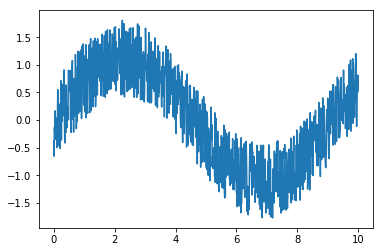

In [100]:
x = np.linspace(0, 10, 1000)
y = datafull[i1]
plt.plot(x, y)

In [47]:
data[i1]

[[0.35309888,
  0.38713064999999997,
  0.399907378,
  0.246576478,
  0.49006811299999986,
  0.40960924,
  0.42004599000000004,
  0.5394205070000001,
  0.563226617,
  0.6763706500000001],
 [0.36,
  0.28875,
  0.44000000000000006,
  0.27125,
  0.32,
  0.34875,
  0.3525,
  0.36375,
  0.255,
  0.345],
 [0.9351940000000001,
  0.8542366999999998,
  0.9647843,
  0.9030307000000001,
  0.9576794,
  1.0811962,
  1.261059,
  0.8035125000000001,
  1.1773096000000003,
  1.2112165000000001],
 [0.26749999999999996,
  0.3825,
  0.43875000000000003,
  0.39125000000000004,
  0.4325,
  0.275,
  0.3075,
  0.37,
  0.29874999999999996,
  0.43624999999999997],
 [0.30625,
  0.22374999999999998,
  0.3975,
  0.2475,
  0.45125000000000004,
  0.26999999999999996,
  0.29125,
  0.39374999999999993,
  0.31124999999999997,
  0.40875000000000006],
 [0.3175,
  0.38125,
  0.35625,
  0.47000000000000003,
  0.32875,
  0.325,
  0.33625000000000005,
  0.29,
  0.37749999999999995,
  0.38625],
 [0.36223004999999997,
  0.57884

In [31]:
w = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
w

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
check[3]

[0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [105]:
datanp = np.array(data)
checknp = np.array(check)

In [35]:
datanp[i].dot(w)

array([ 4.60353708,  9.8129668 ,  3.20875   ,  6.34448592,  3.5925    ,
        3.19625   , 11.4465127 ,  8.71026157,  3.5125    ,  3.82875   ])

In [36]:
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [37]:
def check_error(w1):
    sum = 0
    for i in [i1 for i1 in range(5000)]:
        ch1 = datanp[i].dot(w1)
        sum = sum + dist(ch1, check[i])
    return sum

In [38]:
res = minimize(check_error, w,  method='powell',
    options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 5941.899598
         Iterations: 13
         Function evaluations: 2356


In [39]:
w11=res.x

In [46]:
w11

array([ 0.52560133,  0.25149356,  0.05370981, -0.08039654, -0.21425452,
       -0.12803731, -0.09536405,  0.03679977,  0.44673586,  0.72629929,
       -0.31774958])

In [40]:
w11

array([ 0.30143113,  0.13524453,  0.02818051, -0.07715198, -0.12902699,
       -0.12837242, -0.11803822,  0.10639138,  0.30939   ,  0.50718665])

In [57]:
datanp[4600].dot(w11)

array([0.37913716, 0.32773516, 0.31935673, 0.2872772 , 0.29082975,
       0.36137224, 0.31621498, 0.55586571, 0.39066725, 0.36058215])

In [55]:
check[4600]

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [113]:
def check_error_end(w1):
    sum = 0
    for i in [i1 for i1 in range(3000, 5000)]:
        ch1 = datanp[i].dot(w11)
        if(i>4000):
            sum = sum + (ch1.dot(w1)-1)*(ch1.dot(w1)-1)
        else:
            sum = sum + (ch1.dot(w1))*(ch1.dot(w1))
    return sum

In [114]:
w_end=np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [115]:
res_end = minimize(check_error_end, w_end,  method='powell',
    options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 450.524786
         Iterations: 19
         Function evaluations: 2707


In [117]:
w21=res_end.x

In [141]:
w21

array([-0.33851082,  0.3546227 ,  0.42704594,  0.27232943,  0.01144549,
        0.00843939,  0.23699028,  0.1973346 ,  0.09304755,  0.21857937])

In [138]:
i=4031
print(checknp[i])
print(datanp[i].dot(w11).dot(w21))

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
0.5921015324869645


In [123]:
max = 0.3
min = 0.6

In [139]:
for el in datanp[3000: 4000]:
    if el.dot(w11).dot(w21) > max:
        max=el.dot(w11).dot(w21)
for el in datanp[4000: 5000]:
    if el.dot(w11).dot(w21) < min:
        min=el.dot(w11).dot(w21)

In [140]:
print(min)
print(max)

0.29533335182979426
1.0914853409274297


In [152]:
y1 = datanp[3000: 4000].dot(w11).dot(w21)
y2 = datanp[1000: 3000].dot(w11).dot(w21)
x = np.linspace(0, 1.5, 30)

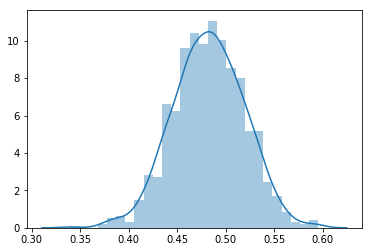

In [153]:
sns_plot = sns.distplot(y1)
fig = sns_plot.get_figure()

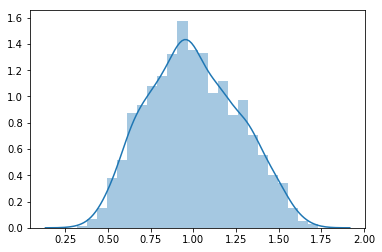

In [154]:
sns_plot = sns.distplot(y2)
fig = sns_plot.get_figure()

In [ ]:
i=0
sums
for el in datanp:
    s = np.sum(check[i])
    check[i]

In [77]:
input = open("test.txt", "r")
i = 0;
data=[]
check=[]
datafull=[]

In [78]:
data1=[]
for line in input:
    if i==0:
        data1 = [mt.fabs(float(x)) for x in line.split()]
        data2 = []
        for t in [i1 for i1 in range(10)]:
            data3 = []
            for t1 in [i2 for i2 in range(10)]:
                data3.append(np.sum(data1[t*100+t1*10:t*100+(t1+1)*10])/10.0)
            data2.append(data3)
        data.append(data2)
        datafull.append(data1)
        i=1;
    else:
        check.append([float(x) for x in line.split()])
        i=0;

In [79]:
datanp = np.array(data)
checknp = np.array(check)

In [84]:
i=0
check_sign=0
res_sign=0
errors=0
full_errors=0;
for el in datanp:
    res = []
    check_sign=0
    res_sign=0
    res_ = el.dot(w11)
    for i2 in [i1 for i1 in range(10)]:
        if check[i][i2]==1:
            check_sign=1
        if res_[i2]>0.4:
            res.append(1)
            res_sign=1
        else:
            res.append(0)
    for i2 in [i1 for i1 in range(10)]:
        if res[i2]==check[i][i2]:
            print("ok")
        else:
            print("false " + str(res[i2]) + "!=" + str(check[i][i2]))
            errors=errors+1
    if(res_sign==check_sign):
        if(res_sign==1):
            print("succesefull sign detected")
        else:
            print("succesefull sign not detected")
    else:
        full_errors=full_errors+1
        if(res_sign==1):
            print("unsuccesefull sign detected")
        else:
            print("unsuccesefull sign not detected")
    print(res)
    i=i+1

ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[1, 0, 0, 0, 1, 1, 1, 0, 1, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
false 1!=0.0
succesefull sign detected
[1, 0, 1, 0, 0, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 1, 0, 1, 0, 0]
ok
ok
ok
ok
false 1!=0.0
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
ok
ok
false 1!=0.0
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 0, 0, 1, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1]
ok
ok
false 1!=0.0
ok
ok
false 0!=1.0
ok
ok
false 1!=0.0
ok
succesefull sign detected
[0, 1, 1, 0, 1, 0, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 1, 0, 0, 1, 1, 0]
ok
ok
false 1!=0.0
ok
ok
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
false 0!=1

false 1!=0.0
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
succesefull sign detected
[1, 0, 1, 0, 0, 0, 1, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 1, 0, 0, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
false 0!=1.0
ok
succesefull sign detected
[1, 0, 1, 0, 1, 1, 1, 0, 0, 0]
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 0, 1, 1, 1, 1]
ok
ok
ok
false 1!=0.0
false 1!=0.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 1, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 0, 1, 0, 0, 1, 0]
ok
ok
ok
ok
ok
false 0!=1.0
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
false 0!=1.0
succesefull sign detected
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0]
ok
ok
ok
ok
ok
false

ok
false 0!=1.0
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 1, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[1, 1, 1, 1, 0, 0, 1, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
ok
ok
ok
false 0!=1.0
ok
ok
ok
false 1!=0.0
ok
ok
succesefull sign detected
[1, 0, 0, 0, 1, 1, 1, 1, 0, 0]
ok
ok
false 1!=0.0
ok
ok
ok
ok
ok
false 1!=0.0
ok
succesefull sign detected
[0, 1, 1, 0, 0, 0, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 1, 0, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 1, 0, 0, 1, 0, 1]
false 0!=1.0
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
ok
ok
ok
ok
false 1!=0.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
su

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 1, 0, 0, 0, 1, 1]
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 0, 0, 0, 1, 1]
ok
false 1!=0.0
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 1, 1, 1, 1, 1, 0, 0, 0, 0]
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
false 1!=0.0
succesefull sign detected
[1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
ok
ok
ok
ok
false 0!=1.0
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
false 0!=1.0
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
ok
ok
ok
o

[1, 1, 1, 0, 0, 1, 0, 0, 1, 0]
false 1!=0.0
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 1, 0, 1, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
succesefull sign detected
[1, 0, 0, 0, 1, 1, 1, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 0, 1, 1, 0, 1, 1, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
false 0!=1.0
false 1!=0.0
succesefull sign detected
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1]
false 0!=1.0
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 1, 1, 1, 1, 0, 0, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

[1, 0, 0, 0, 1, 1, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 1, 0, 1, 0, 1, 1, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 0, 0, 1, 0, 0, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
false 1!=0.0
false 0!=1.0
succesefull sign detected
[0, 0, 0, 1, 0, 1, 0, 0, 1, 0]
false 1!=0.0
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[1, 0, 1, 1, 0, 0, 1, 0, 0, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
false 1!=0.0
succesefull sign detected
[0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 0, 1, 1, 1, 0, 1, 0]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 0, 0, 0, 1, 0, 1]

succesefull sign detected
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
ok
ok
ok
ok
false 1!=0.0
ok
ok
false 1!=0.0
ok
ok
succesefull sign detected
[1, 1, 0, 0, 1, 1, 0, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 1, 0, 1, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 0, 0, 1, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 0, 1, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 1, 1, 0, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
succesefull sign detected
[0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
ok
ok
ok
false 1!=0.0
o

ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 0, 1, 1, 0, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
ok
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
succesefull sign detected
[1, 1, 0, 0, 1, 0, 0, 1, 0, 1]
ok
false 1!=0.0
ok
ok
false 0!=1.0
ok
ok
ok
ok
false 0!=1.0
succesefull sign detected
[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]
ok
ok
ok
ok
false 1!=0.0
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
false 0!=1.0
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
false 1!=0.0
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 1, 1, 0, 0, 1, 1, 1, 0, 0]
ok
ok
ok
ok
ok
ok
ok
false 1!=0.0
ok
ok
succesefull sign detected
[0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
false 0!=1.0
ok
succesefull sign detected
[0, 1, 1, 0, 0, 1, 1, 0, 0, 0]
false 0!=

ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 1, 1, 0, 0, 1]
ok
ok
false 1!=0.0
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 0, 1, 0, 1, 0, 0]
false 0!=1.0
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
succesefull sign detected
[0, 1, 1, 0, 1, 0, 0, 1, 0, 1]
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 0, 0, 1, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 1, 1, 1, 0, 0]
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[1, 0, 1, 0, 0, 1, 0, 0, 0, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
false 0!=1.0
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
ok
succesefull sign detected
[0, 0, 0, 1, 0, 1, 0, 1, 1, 1]
ok
ok
ok
ok
ok
ok
ok
false 0!=1.0
ok
ok
succesefull sign detected
[0, 0, 1, 1, 1, 1, 0, 0, 1, 0]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull sign detected
[1, 0, 0, 1, 0, 0, 1, 0, 0, 1]
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
succesefull s

In [85]:
errors

917

In [86]:
check[0]

[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0]

605 ошибок из 10000 сегментов


In [87]:
full_errors

2

2 ошибки из 1000 сигналов, что вполне хорошо
